In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


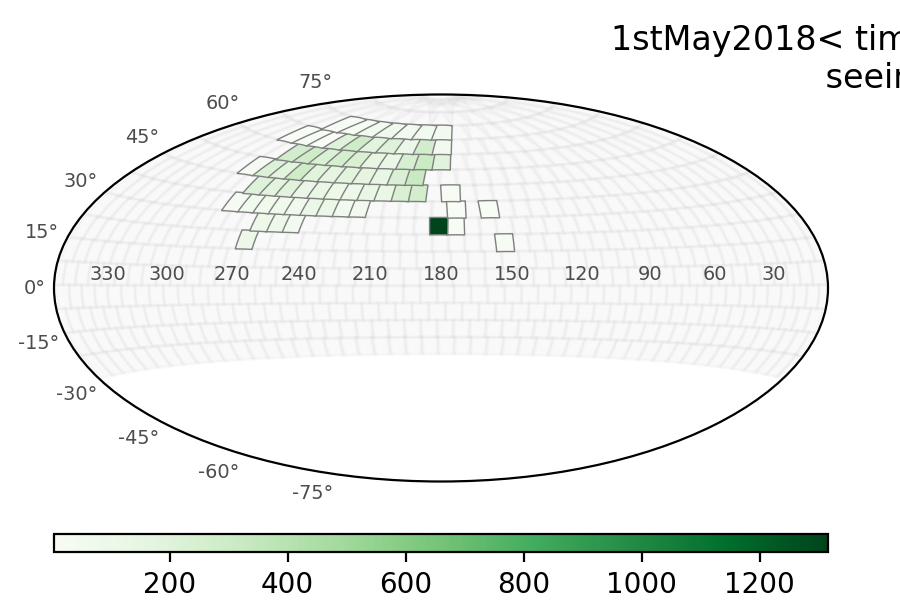

In [7]:
from ztfquery import query
zquery = query.ZTFQuery()
# Check what are the Julian Dates of 1st of May 2018 and 1st of June 2018
from astropy import time
jd_1may18 = time.Time("2018-05-01").jd # 2458239.5
jd_1june18 = time.Time("2018-06-01").jd # 2458270.5
# Do the Query to see what exists
zquery.load_metadata(sql_query="seeing<2 and obsjd BETWEEN 2458239.5 AND 2458270.5") # this will take about 1min

# The information is save as Pandas DataFrame undern `metatable`
zquery.metatable # it contains about 50 000 entries...
# Show the observed fields, limiting it to the main (or primary) grid for visibility (say grid="secondary" to see this rest):
fig = zquery.show_gri_fields(title="1stMay2018< time <1stJune2018 \n seeing<2", grid="main")


In [8]:
fig.savefig("/Users/mrigault/Libraries/ztfquery/examples/figures/seeing_lower2_inMay.png", dpi=250)

# Average `value` using a field

`value` could be anything within the data DataFrame (metatable or data depending on your object see `_data`)

### Case of Airmass

<IPython.core.display.Javascript object>


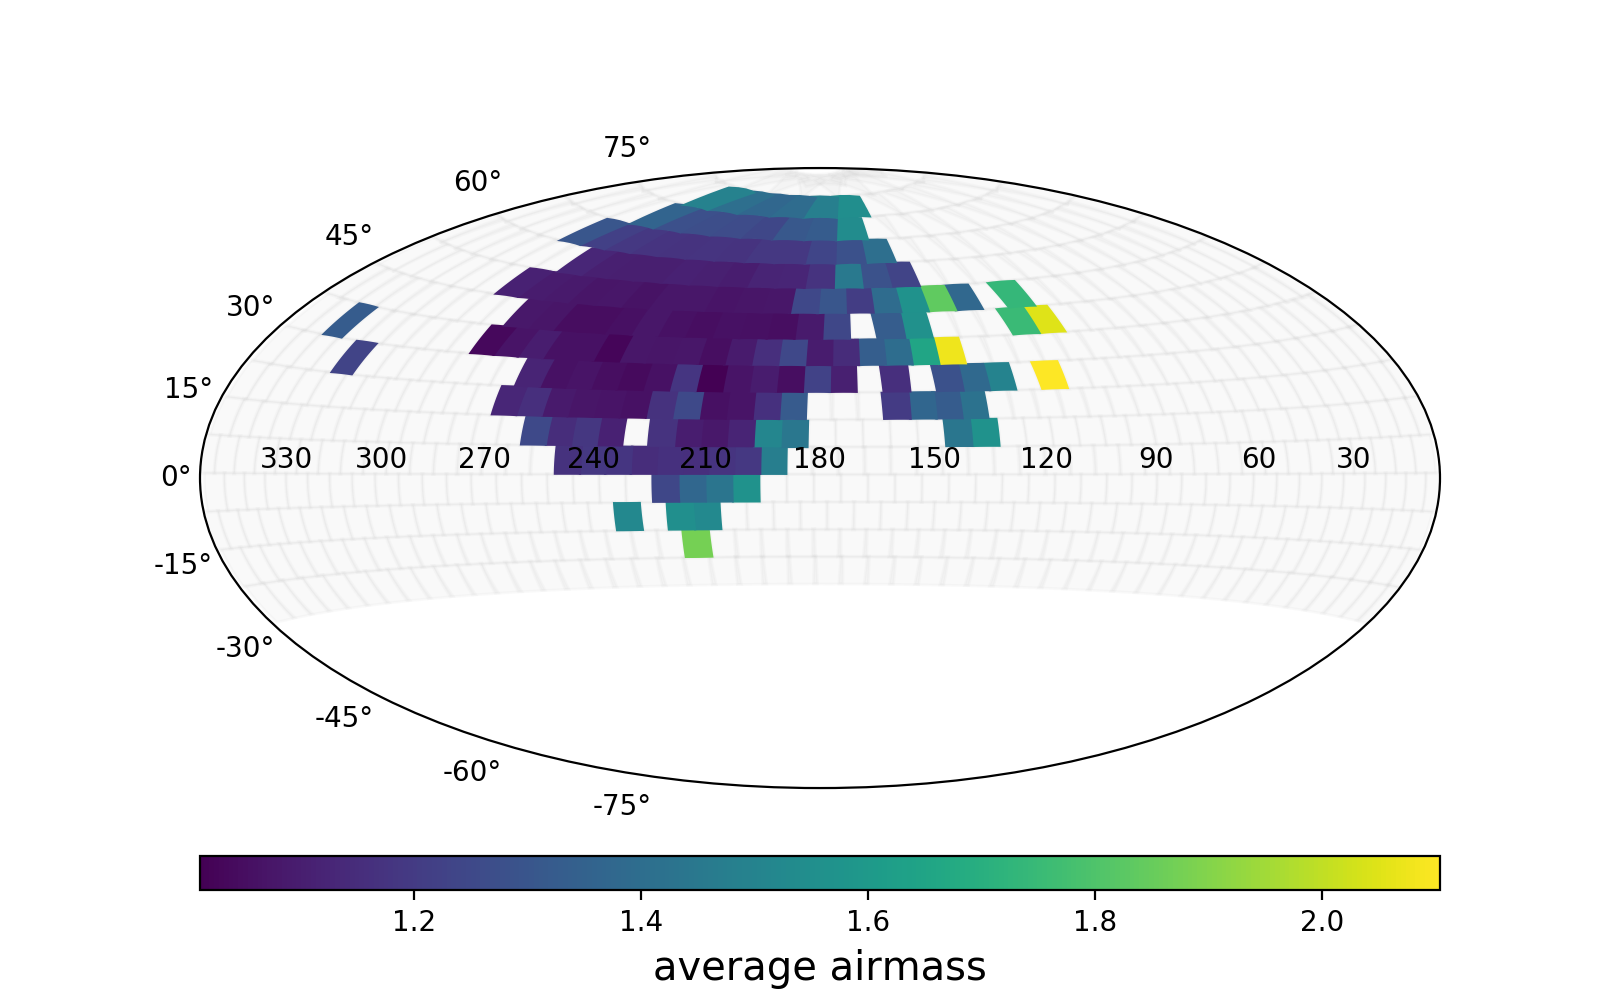

In [10]:
field_airmass = zquery.get_field_average_value("airmass", grid="main")

zquery.show_fields(field_airmass, clabel="average airmass")
fig = mpl.gca().figure
fig.savefig("/Users/mrigault/Libraries/ztfquery/examples/figures/gri_projection_averageairmass_may2018.png", dpi=250)

### Case of RA

<IPython.core.display.Javascript object>


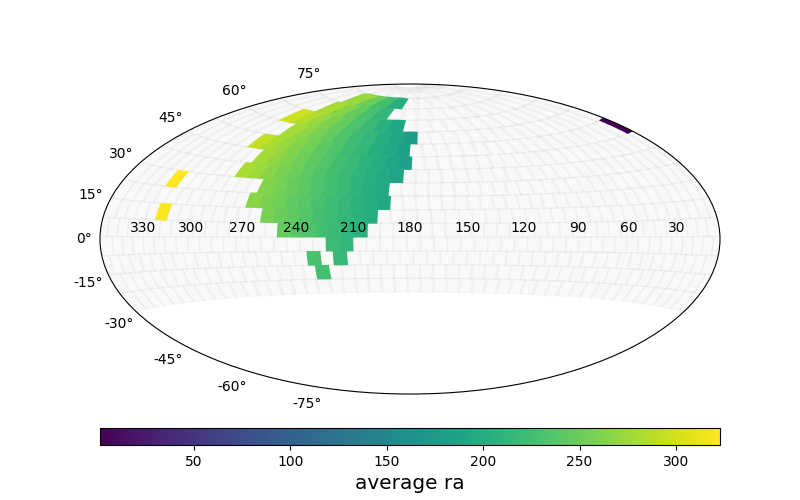

In [8]:
field_airmass = zquery.get_field_average_value("ra", grid="main")

zquery.show_fields(field_airmass, clabel="average ra")

In [9]:
# list of value in this object
zquery.metatable.columns

Index(['ra', 'dec', 'infobits', 'field', 'ccdid', 'qid', 'rcid', 'fid',
       'filtercode', 'pid', 'nid', 'expid', 'itid', 'imgtype', 'imgtypecode',
       'obsdate', 'obsjd', 'exptime', 'filefracday', 'seeing', 'airmass',
       'moonillf', 'moonesb', 'maglimit', 'crpix1', 'crpix2', 'crval1',
       'crval2', 'cd11', 'cd12', 'cd21', 'cd22', 'ra1', 'dec1', 'ra2', 'dec2',
       'ra3', 'dec3', 'ra4', 'dec4', 'ipac_pub_date', 'ipac_gid'],
      dtype='object')

# Any Dictionary you want

<IPython.core.display.Javascript object>


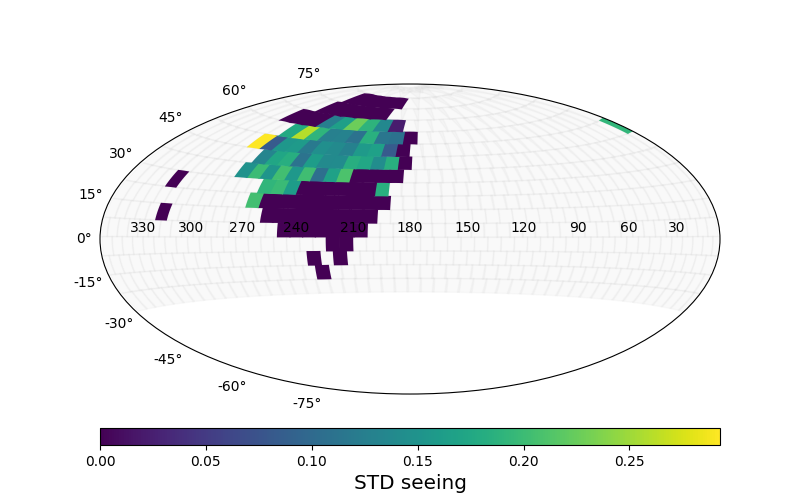

In [10]:
field_std_seeing = {f_: np.nanstd(zquery._data[np.in1d(zquery._data["field"], f_)]["seeing"])
                    for f_ in zquery.get_observed_fields(grid="main")}

zquery.show_fields(field_std_seeing, clabel="STD seeing")

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'